In [163]:
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd
import numpy as np
from elosports.elo import Elo
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df = pd.read_csv('nfl_games_all.csv')

In [165]:
df2020 = df[df.year_num == 2020]
df2020.head()

,Unnamed: 0,year_num,week_num,raw_data,winner_name,winner_score,loser_name,loser_score,is_tie,row_num
4494,4495,2020,1,"KC 34, HOU 20",KC,34.0,HOU,20.0,False,307
4495,4496,2020,1,"SEA 38, ATL 25",SEA,38.0,ATL,25.0,False,307
4496,4497,2020,1,"BUF 27, NYJ 17",BUF,27.0,NYJ,17.0,False,307
4497,4498,2020,1,"CHI 27, DET 23",CHI,27.0,DET,23.0,False,307
4498,4499,2020,1,"GB 43, MIN 34",GB,43.0,MIN,34.0,False,307


In [166]:
############### TEST ####################
# Instantiate League
eloLeague = Elo(k = 100) 

# Add Players
for name in set(df['winner_name']):
    eloLeague.addPlayer(name, rating = 1200)

for row in df2020.iterrows():
    eloLeague.gameOver(winner=row[1]['winner_name'], loser=row[1]['loser_name'], winnerHome=0)


In [167]:
for name in set(df['winner_name']):
    print(name, eloLeague.ratingDict[name])

LV 1235.2827619287136
LAR 1292.3125599522928
KC 1550.0245680956755
TB 1248.6206976832864
IND 1343.4055357526954
NYG 1166.7170909786325
DAL 983.5082069821191
TEN 1417.023254977669
WSH 1083.731990152815
ATL 1226.0284754344468
HOU 1166.2275185406888
PHI 1024.4306928428225
ARI 1193.6402685412104
PIT 1594.17837625263
MIA 1306.4681215486728
NO 1515.3973230586485
LAC 1003.8422025098961
CIN 1000.1580127198331
BAL 1217.220242338921
DET 1000.9836971919068
DEN 1159.7698424151404
CAR 1045.2371484270268
MIN 1205.7920098438876
GB 1295.5717255889047
NE 1187.6917758536727
NYJ 786.7748140575363
CHI 1074.42937082527
SEA 1354.6897297846022
SF 1200.767819479985
CLE 1346.845709834421
JAX 820.9622843069716
BUF 1352.2661720990054


In [194]:
# Containers 
week_container = []
year_container = []
name_container = []
elo_container = []
teams = set(df['winner_name'])

# Instantiate League
eloLeague = Elo(k = 15) 

# Add Players
for name in set(df['winner_name']):
    eloLeague.addPlayer(name, rating = 1200)

for y in range (2002,2021):
    for w in range(1,18):
        
        # Subset to the week and year
        loop_df = df[(df.year_num == y) & (df.week_num == w) & (df.is_tie == False)]
        
        # Play games of the week
        for row in loop_df.iterrows():
            eloLeague.gameOver(winner=row[1]['winner_name'], loser=row[1]['loser_name'], winnerHome=0)
            
        # Get new Elos
        for name in teams:
            elo_container.append(eloLeague.ratingDict[name])
            name_container.append(name)
            week_container.append(w)
            year_container.append(y)
            
            
              

In [195]:
# dictionary of lists  
dict = {'year_num': year_container,
        'week_num': week_container,
        'row_num': [(x-2002)*17 + y for x,y in zip(year_container, week_container)],
        'year_week':[str(x) + '-' + str(y) for x,y in zip(year_container, week_container)],
        'team': name_container,
        'elo': elo_container
       }  
    
elos_df = pd.DataFrame(dict)

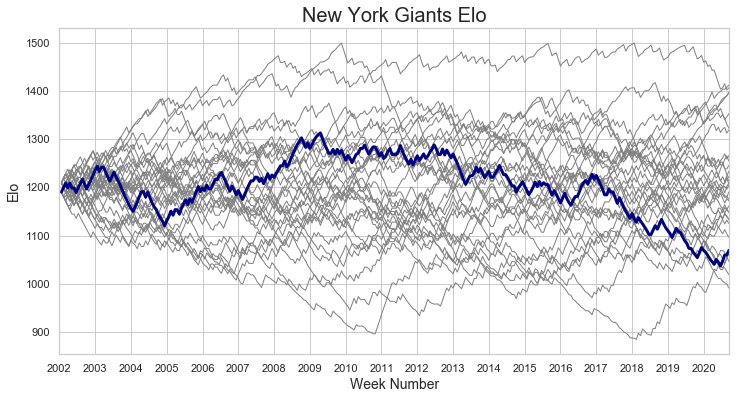

In [209]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

for name in set(elos_df.team):
    if name not in ['NYG']:
        sns.lineplot(x='row_num', y='elo', data=elos_df[elos_df.team==name], color='gray', linewidth=1)
        
sns.lineplot(x='row_num', y='elo', data=elos_df[elos_df.team=="NYG"], color='navy', linewidth=3)
        
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("New York Giants Elo", fontsize = 20)
plt.xlabel("Week Number", fontsize =14)
plt.ylabel("Elo", fontsize =14)
plt.xlim(0,318)
plt.xticks(range(0,318,17), range(2002,2021))
plt.show()

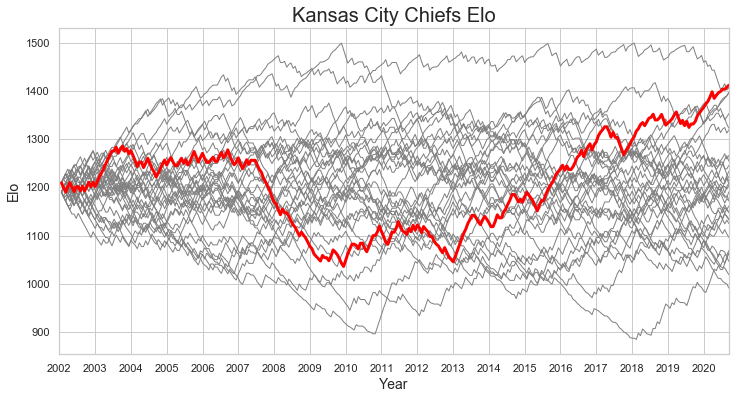

In [207]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

for name in set(elos_df.team):
    if name not in ['KC']:
        sns.lineplot(x='row_num', y='elo', data=elos_df[elos_df.team==name], color='gray', linewidth=1)
        
sns.lineplot(x='row_num', y='elo', data=elos_df[elos_df.team=="KC"], color='red', linewidth=3)
        
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Kansas City Chiefs Elo", fontsize = 20)
plt.xlabel("Year", fontsize =14)
plt.ylabel("Elo", fontsize =14)
plt.xlim(0,318)
plt.xticks(range(0,318,17), range(2002,2021))
plt.show()

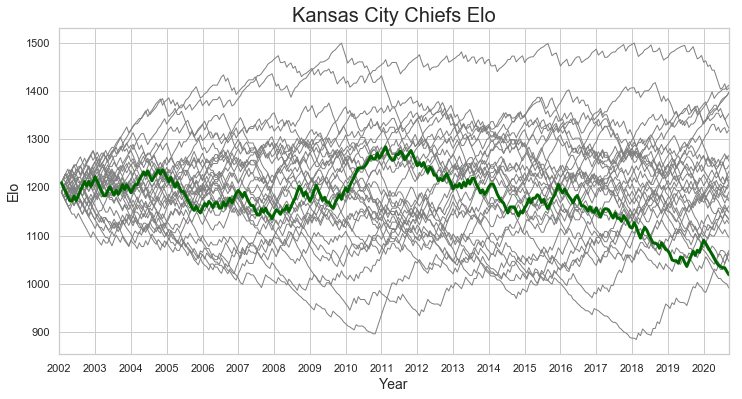

In [210]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

for name in set(elos_df.team):
    if name not in ['NYJ']:
        sns.lineplot(x='row_num', y='elo', data=elos_df[elos_df.team==name], color='gray', linewidth=1)
        
sns.lineplot(x='row_num', y='elo', data=elos_df[elos_df.team=="NYJ"], color='darkgreen', linewidth=3)
        
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Kansas City Chiefs Elo", fontsize = 20)
plt.xlabel("Year", fontsize =14)
plt.ylabel("Elo", fontsize =14)
plt.xlim(0,318)
plt.xticks(range(0,318,17), range(2002,2021))
plt.show()

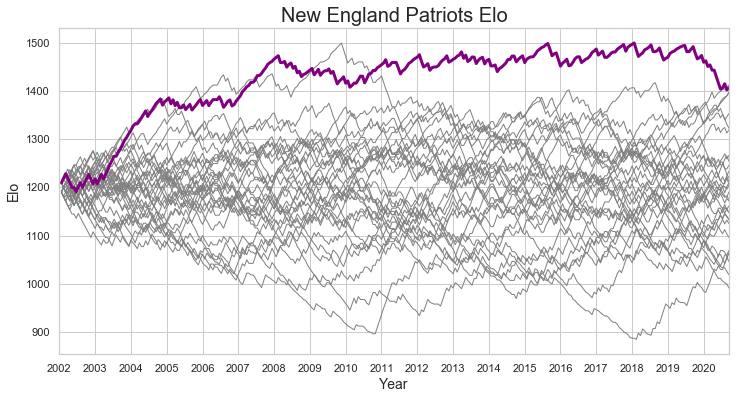

In [213]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

for name in set(elos_df.team):
    if name not in ['NE']:
        sns.lineplot(x='row_num', y='elo', data=elos_df[elos_df.team==name], color='gray', linewidth=1)
        
sns.lineplot(x='row_num', y='elo', data=elos_df[elos_df.team=="NE"], color='purple', linewidth=3)
        
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("New England Patriots Elo", fontsize = 20)
plt.xlabel("Year", fontsize =14)
plt.ylabel("Elo", fontsize =14)
plt.xlim(0,318)
plt.xticks(range(0,318,17), range(2002,2021))
plt.show()

## 2020 Season 

In [177]:
# Containers 
week_container = []
year_container = []
name_container = []
elo_container = []
teams = set(df['winner_name'])

# Instantiate League
eloLeague = Elo(k = 15) 

# Add Players
for name in set(df['winner_name']):
    eloLeague.addPlayer(name, rating = 1200)

for y in [2020]:
    for w in range(1,11):
        
        # Subset to the week and year
        loop_df = df[(df.year_num == y) & (df.week_num == w) & (df.is_tie == False)]
        
        # Play games of the week
        for row in loop_df.iterrows():
            if not row[1]['is_tie']:
                eloLeague.gameOver(winner=row[1]['winner_name'], loser=row[1]['loser_name'], winnerHome=0)
            
        # Get new Elos
        for name in teams:
            elo_container.append(eloLeague.ratingDict[name])
            name_container.append(name)
            week_container.append(w)
            year_container.append(y)
            
            
              

In [178]:
# dictionary of lists  
dict = {'year_num': year_container,
        'week_num': week_container,
        'year_week':[str(x) + '-' + str(y) for x,y in zip(year_container, week_container)],
        'team': name_container,
        'elo': elo_container
       }  
    
elos_df = pd.DataFrame(dict)

In [201]:
elos_df[(elos_df.year_num == 2020) & (elos_df.week_num == 10)].sort_values('elo', ascending=False)

,year_num,week_num,row_num,year_week,team,elo
10104,2020,10,316,2020-10,NE,1415.290893
10082,2020,10,316,2020-10,KC,1403.852876
10093,2020,10,316,2020-10,PIT,1387.392155
10095,2020,10,316,2020-10,NO,1385.130272
10098,2020,10,316,2020-10,BAL,1343.071769
10107,2020,10,316,2020-10,SEA,1340.579623
10103,2020,10,316,2020-10,GB,1324.416680
10102,2020,10,316,2020-10,MIN,1269.842552
10081,2020,10,316,2020-10,LAR,1258.252857
10091,2020,10,316,2020-10,PHI,1239.786364


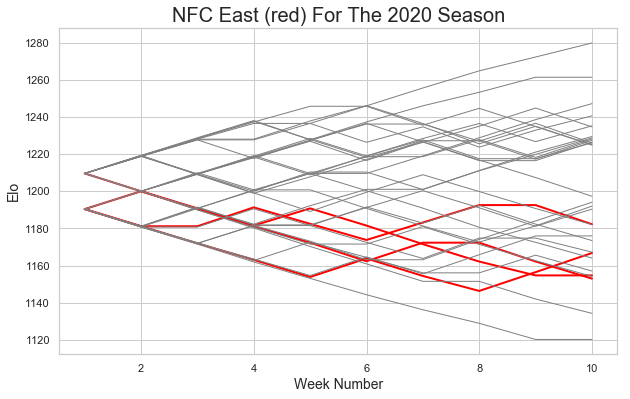

In [188]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
#sns.lineplot(x='week_num', y='elo', data=elos_df, hue='team', linewidth=2)

for name in set(elos_df.team):
    if name in ['NYG', 'PHI', 'WSH', 'DAL']:
        sns.lineplot(x='week_num', y='elo', data=elos_df[elos_df.team==name], color='red', linewidth=2)
    else:
        sns.lineplot(x='week_num', y='elo', data=elos_df[elos_df.team==name], color='gray', linewidth=1)
        
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("NFC East (red) For The 2020 Season", fontsize = 20)
plt.xlabel("Week Number", fontsize =14)
plt.ylabel("Elo", fontsize =14)
plt.show()